# Exploratory Data Analysis

In [9]:
!pip install seaborn

# 1. Pengumpulan dan Persiapan Data:

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [10]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#exclude rows with TotalCharges Column contain white space
telco = telco.loc[~telco['TotalCharges'].str.contains(' ')]

#transform TotalCharges col to float
telco['TotalCharges'] = telco['TotalCharges'].astype(float)

# 2. Pembersihan Data:

In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [20]:
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
#number of duplicated data
telco.duplicated().sum()

np.int64(0)

Observasi :
Tidak ada missing value dan duplikat pada dataset ini

# 3. Analisis Data Eksploratif (EDA)

## Statistical summary

In [6]:
#grouping column based on data type
categoricals = ['customerID', 'gender', 'Partner', 'Dependents', 'customerID', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn',]
numericals = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [31]:
#numerical statistical summary
telco[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observasi :
* mayoritas pelanggan bukan warga senior.
* pelanggan memiliki masa berlangganan bervariasi dari 1 sampai 72 bulan.
* biaya rata-rata pelanggan adalah 64.79 perbulan.
* biaya terendah adalah 18.25 dan yang tertinggi adalah 118.75 perbulan.

In [32]:
#categorical statistical summary
telco[categoricals].describe()

,customerID,gender,Partner,Dependents,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,7032,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,3186-AJIEK,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,1,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Observasi :
* jumlah total pelanggan : 7032 dengan customerID yang unique.
* kebanyakan pelanggan tidak memiliki layanan tambahan seperti MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.
* kebanyakan pelanggan melakukan kontrak layanan perbulan (Month-to-Month) dan melakukan pembayaran secara Electronic Check
* gender didominasi dengan pelanggan laki-laki (Male) dengan jumlah 3549.
* 3639 pelanggan tidak memiliki pasangan dan 4933 memiliki tanggungan (Dependents).

In [37]:
#caterogical counts
for col in categoricals:
  print(f"Value counts of {col} column")
  print(telco[col].value_counts(), '\n')

Value counts of customerID column
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
             ..
8091-TTVAX    1
7469-LKBCI    1
9763-GRSKD    1
6388-TABGU    1
7892-POOKP    1
Name: count, Length: 7032, dtype: int64 

Value counts of gender column
gender
Male      3549
Female    3483
Name: count, dtype: int64 

Value counts of Partner column
Partner
No     3639
Yes    3393
Name: count, dtype: int64 

Value counts of Dependents column
Dependents
No     4933
Yes    2099
Name: count, dtype: int64 

Value counts of customerID column
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
             ..
8091-TTVAX    1
7469-LKBCI    1
9763-GRSKD    1
6388-TABGU    1
7892-POOKP    1
Name: count, Length: 7032, dtype: int64 

Value counts of PhoneService column
PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

Value counts of MultipleLines column
MultipleLines
No                  3385
Yes           

## Univariate Analysis

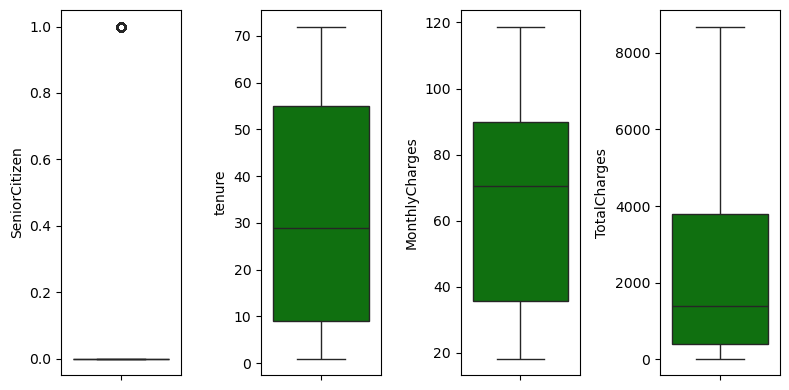

In [7]:
#figure size
plt.figure(figsize=(8,4))

#plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=telco[features[i]], color='green')
    plt.tight_layout()

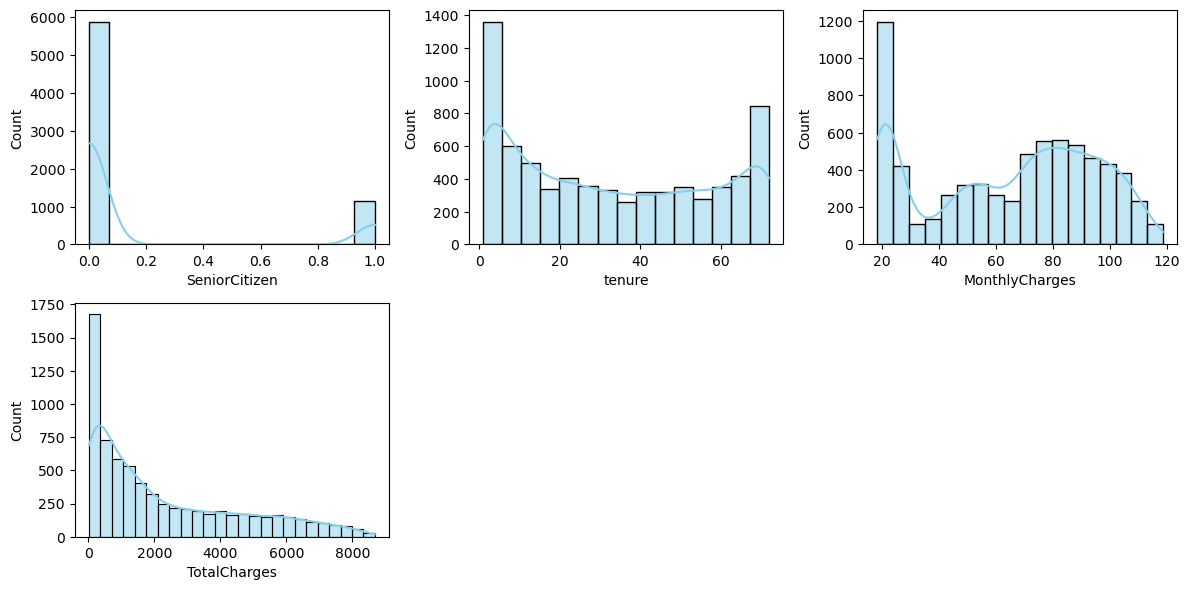

In [8]:
#figure size
plt.figure(figsize=(12,6))

#plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=telco[features[i]], color='skyblue', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

Observation :
* outlier pada SeniorCitizen dikarenakan hanya ada 0 (No), dan 1 (Yes) sehingga nilai masih masuk akal, masih banyak pelanggan yang bukan senior citizen.
* pada tenure terdapat peningkatan jumlah pelanggan lagi pada sekitar 70 bulan, yang menandakan ada sebagian pelanggan yang telah berlangganan dalam jangka waktu yang cukup lama.
* distribusi TotalCharges sangat menurun kekanan, mayoritas pelanggan memiliki total tagihan dibawah 2000.

# Multivariate Analysis

In [9]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Text(0.5, 1.0, 'Korelasi antara Churn dan status pelanggan yang memiliki partner')

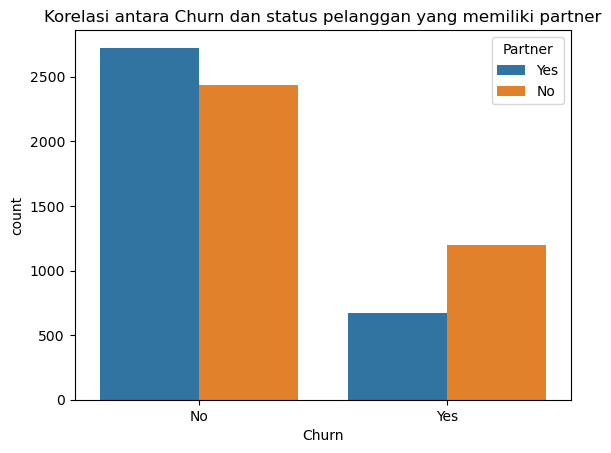

In [20]:
sns.countplot(data=telco,
            x='Churn',
            hue='Partner'
            )
plt.title('Korelasi antara Churn dan status pelanggan yang memiliki partner')

Observation :
* pada kategori no, mayoritas pelanggan yang memiliki partner lebih tinggi dibandingkan pelanggan yang tidak memiliki partner.
* pada kategori yes, pelanggan yang tidak memiliki partner lebih cenderung melakukan churn.

<Axes: >

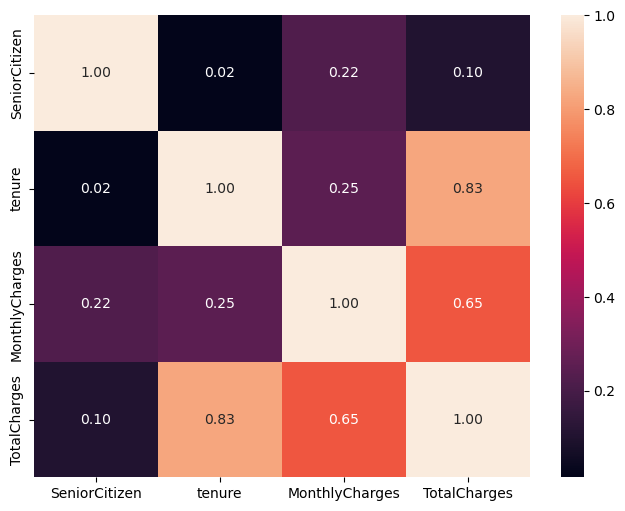

In [22]:
#correlation heatmap
plt.figure(figsize=(8,6))
correlation = telco[numericals].corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation :
* SeniorCitizen tidak memiliki hubungan yang kuat dengan variabel lain.
* tenure, MonthlyCharges, TotalCharges memiliki hubungan yang erat.

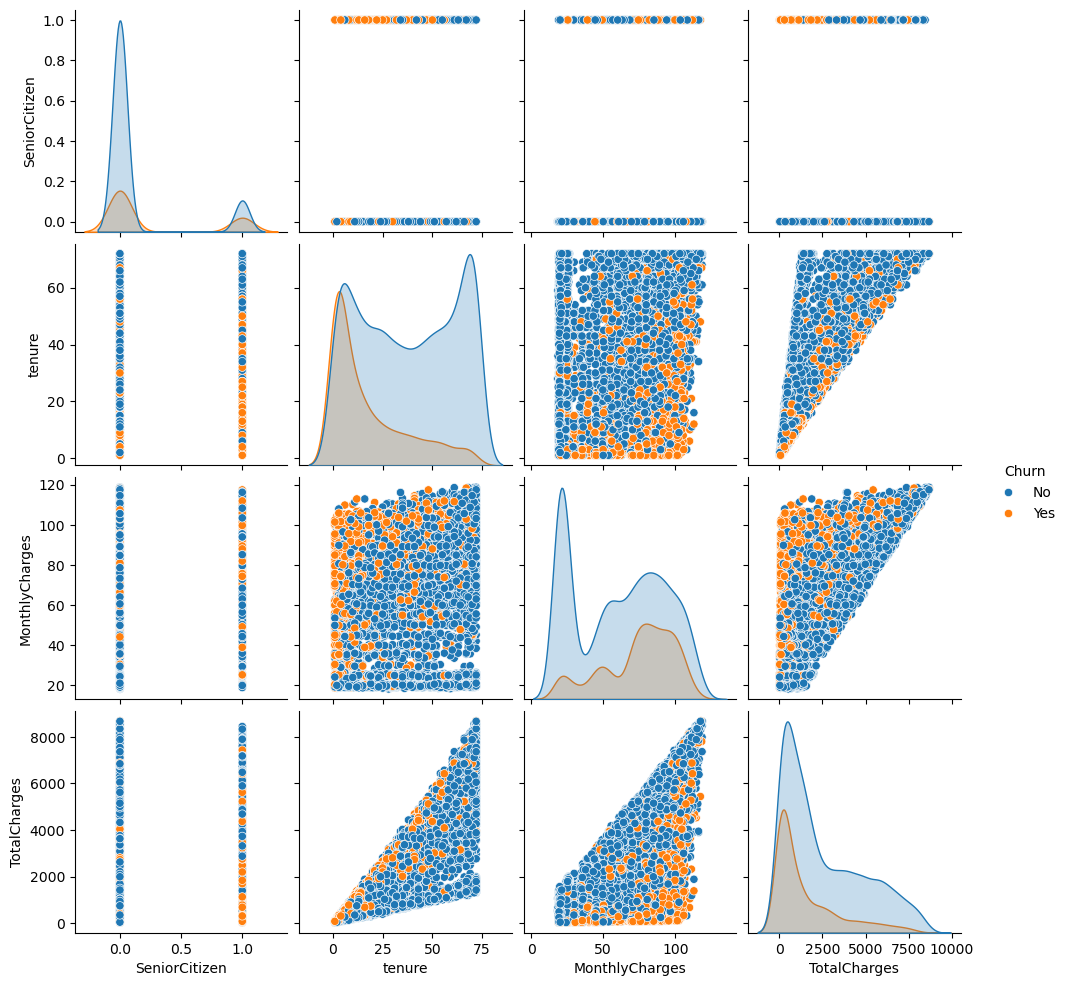

In [27]:
#pairplot of the data
sns.pairplot(telco, hue='Churn')

# 4. Eksplorasi Mendalam

1. adakah korelasi antara jumlah Churn berdasarkan Contract?

In [39]:
#grouping churn and contract
churn_contract = telco.groupby(['Churn', 'Contract']).size().reset_index(name = 'count')
churn_contract

,Churn,Contract,count
0,No,Month-to-month,2220
1,No,One year,1306
2,No,Two year,1637
3,Yes,Month-to-month,1655
4,Yes,One year,166
5,Yes,Two year,48


<Axes: xlabel='Churn', ylabel='count'>

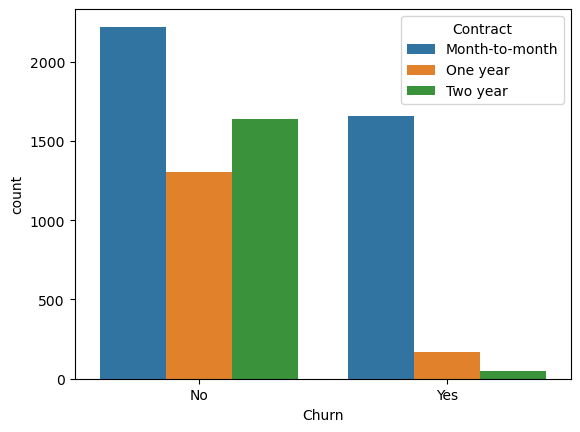

In [38]:
#plotting
sns.countplot(data=telco,
            x='Churn',
            hue='Contract'
            )

Observasi :
* pelanggan dengan kontrak Month-to-month lebih cenderung melakukan churn dibandingkan jenis kontrak lainnya, ini menandakan pelanggan dengan kontrak jangka panjang cenderung lebih loyal terhadap layanan produk yang mereka gunakan.

2. apakah pelanggan yang lebih lama berlangganan (tenure) cenderung memiliki rata-rata tagihan bulanan (MonthlyCharges) yang lebih rendah? 

In [90]:
#grouping tenure and MonthlyCharges
tenure_monthly = telco.groupby('tenure').agg(
    Monthly_Charges=('MonthlyCharges','mean')
).reset_index()
tenure_monthly

,tenure,Monthly_Charges
0,1,50.485808
1,2,57.206303
2,3,58.015000
3,4,57.432670
4,5,61.003759
...,...,...
67,68,73.321000
68,69,70.823158
69,70,76.378992
70,71,73.735588


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

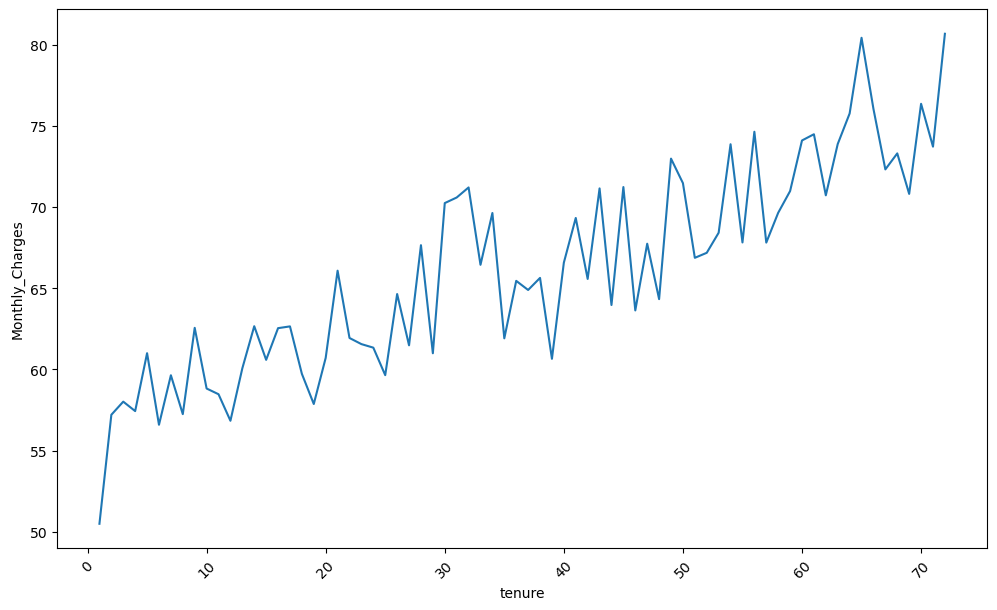

In [91]:
# num buyer progression
plt.figure(figsize=(12,7))
sns.lineplot(data=tenure_monthly,
             x='tenure',
             y='Monthly_Charges')
plt.xticks(rotation=45)

Observasi :
* semakin lama pelanggan berlangganan, semakin tinggi juga tagihan bulanan mereka.